In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import ttest_ind, shapiro

In [3]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### 1

In [5]:
# Basic summary statistics for numerical variables
summary_statistics = df.describe()
print(summary_statistics)

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

### 2

In [7]:
# Replace '/' with '-' in the 'date' column
df['date'] = df['date'].str.replace('/', '-')

# Convert the 'date' column to datetime format for easy manipulation
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

# Number of unique working days
working_days = df['date'].nunique()

# Count of quarters
quarter_counts = df['quarter'].value_counts()

# Print the results
print(f"Number of unique working days: {working_days}")
print("\nCount of quarters:")
print(quarter_counts)


Number of unique working days: 59

Count of quarters:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


### 3

              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


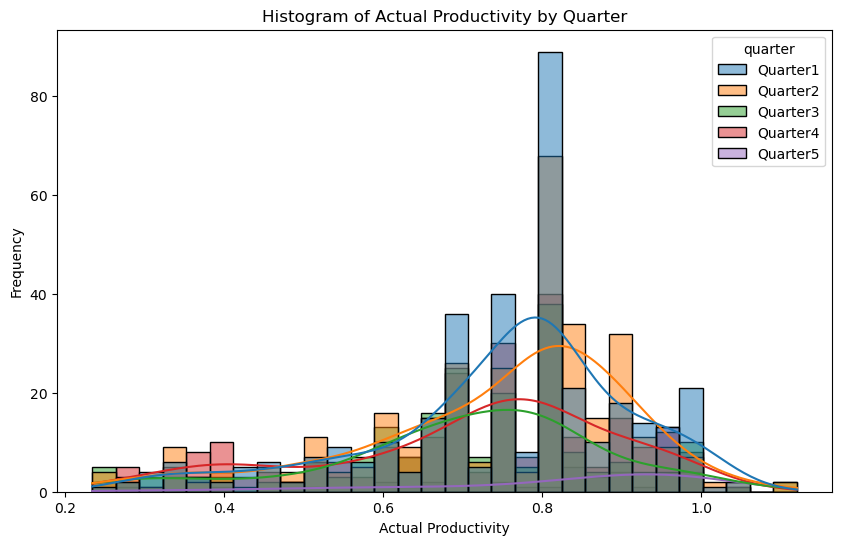

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation of actual productivity for each quarter
productivity_stats = df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print(productivity_stats)

# Plot histogram of actual productivity based on each quarter
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='actual_productivity', hue='quarter', kde=True, bins=30)
plt.title('Histogram of Actual Productivity by Quarter')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


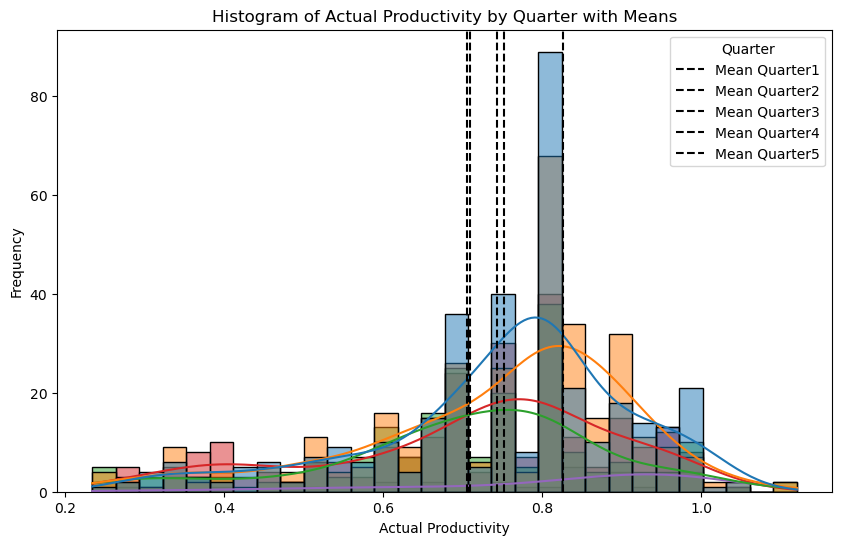

In [10]:
# Plot histogram with vertical lines for mean of each quarter
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='actual_productivity', hue='quarter', kde=True, bins=30)

# Add vertical lines for the mean of each quarter
for quarter in df['quarter'].unique():
    mean_val = df[df['quarter'] == quarter]['actual_productivity'].mean()
    plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean {quarter}')

plt.title('Histogram of Actual Productivity by Quarter with Means')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend(title='Quarter')
plt.show()


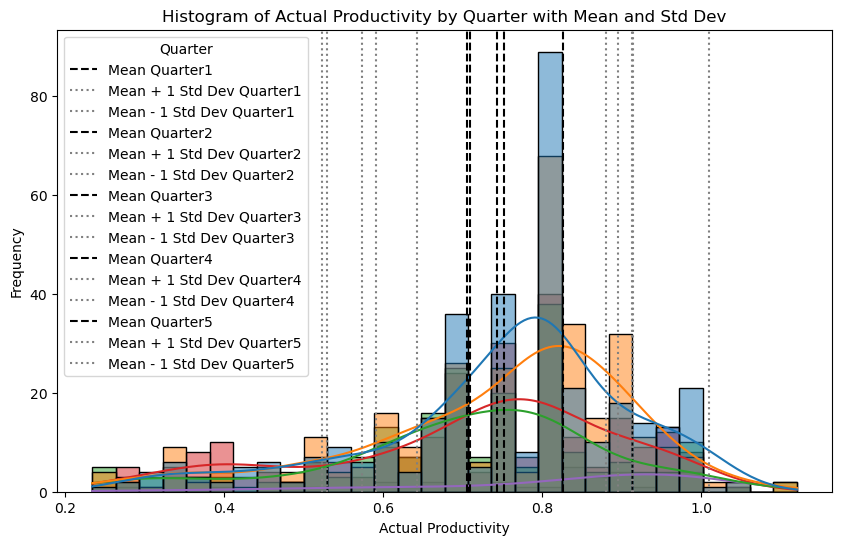

In [11]:
# Plot histogram with vertical lines for mean and shaded areas for standard deviation of each quarter
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='actual_productivity', hue='quarter', kde=True, bins=30)

# Add vertical lines for the mean and standard deviation for each quarter
for quarter in df['quarter'].unique():
    # Calculate mean and standard deviation for each quarter
    mean_val = df[df['quarter'] == quarter]['actual_productivity'].mean()
    std_val = df[df['quarter'] == quarter]['actual_productivity'].std()
    
    # Plot mean line
    plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean {quarter}')
    
    # Plot lines for mean ± standard deviation
    plt.axvline(mean_val + std_val, color='grey', linestyle=':', label=f'Mean + 1 Std Dev {quarter}')
    plt.axvline(mean_val - std_val, color='grey', linestyle=':', label=f'Mean - 1 Std Dev {quarter}')

plt.title('Histogram of Actual Productivity by Quarter with Mean and Std Dev')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend(title='Quarter')
plt.show()


### 4

In [13]:
# Number of rows for sewing and finishing departments
department_counts = df['department'].value_counts()

# Print the counts for sewing and finishing departments
sewing_count = department_counts.get('sewing', 0)
finishing_count = department_counts.get('finishing', 0)

print(f"Sewing Department Count: {sewing_count}")
print(f"Finishing Department Count: {finishing_count}")


Sewing Department Count: 691
Finishing Department Count: 506


### 5

                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


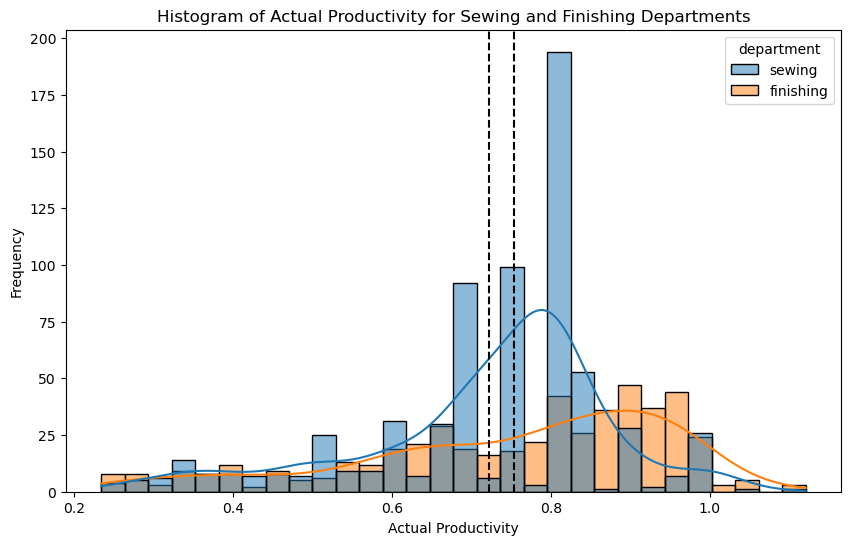

In [15]:
# Calculate mean and standard deviation of actual productivity for sewing and finishing departments
dept_productivity_stats = df.groupby('department')['actual_productivity'].agg(['mean', 'std'])
print(dept_productivity_stats)

# Filter data for sewing and finishing departments
df_sewing_finishing = df[df['department'].isin(['sewing', 'finishing'])]

# Plot histogram of actual productivity based on department
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sewing_finishing, x='actual_productivity', hue='department', kde=True, bins=30)

# Add vertical lines for the mean of each department
for dept in ['sewing', 'finishing']:
    mean_val = df[df['department'] == dept]['actual_productivity'].mean()
    plt.axvline(mean_val, linestyle='--', label=f'Mean {dept.capitalize()}', color='black')

plt.title('Histogram of Actual Productivity for Sewing and Finishing Departments')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


### 6

In [17]:
# Convert 'date' column to datetime (if not done already)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count of teams across the year
team_counts = df.groupby('year')['team'].value_counts().unstack(fill_value=0)

# Count of SMV (Standard Minute Value) across the year
smv_counts = df.groupby('year')['smv'].value_counts().unstack(fill_value=0)

# Display results
print("Team counts across the year:")
print(team_counts.T)

print("\nSMV counts across the year:")
print(smv_counts.T)


Team counts across the year:
year  2015
team      
1      105
2      109
3       95
4      105
5       93
6       94
7       96
8      109
9      104
10     100
11      88
12      99

SMV counts across the year:
year   2015
smv        
2.90    108
3.90     20
3.94    192
4.08     21
4.15     76
...     ...
49.10     1
50.48     2
50.89     1
51.02     1
54.56     1

[70 rows x 1 columns]


### 7

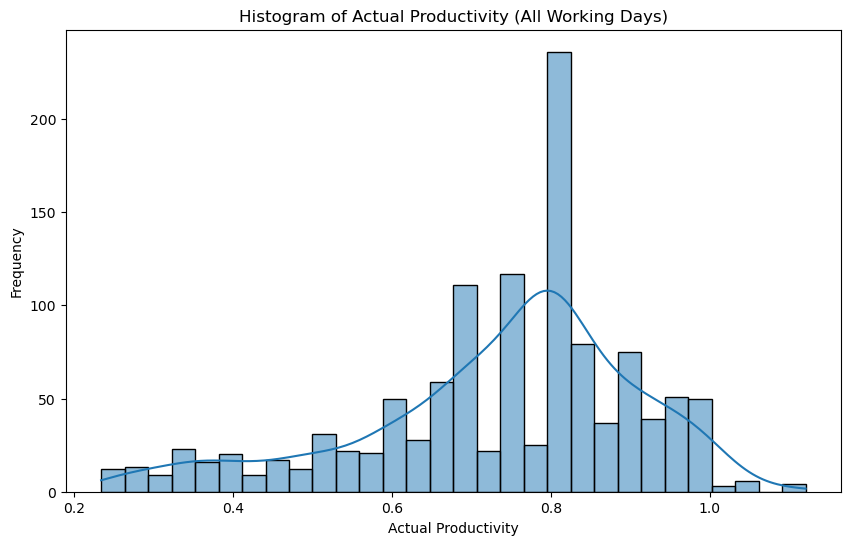

In [19]:
# 1. Histogram of Actual Productivity based on working days
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_productivity'], bins=30, kde=True)
plt.title('Histogram of Actual Productivity (All Working Days)')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

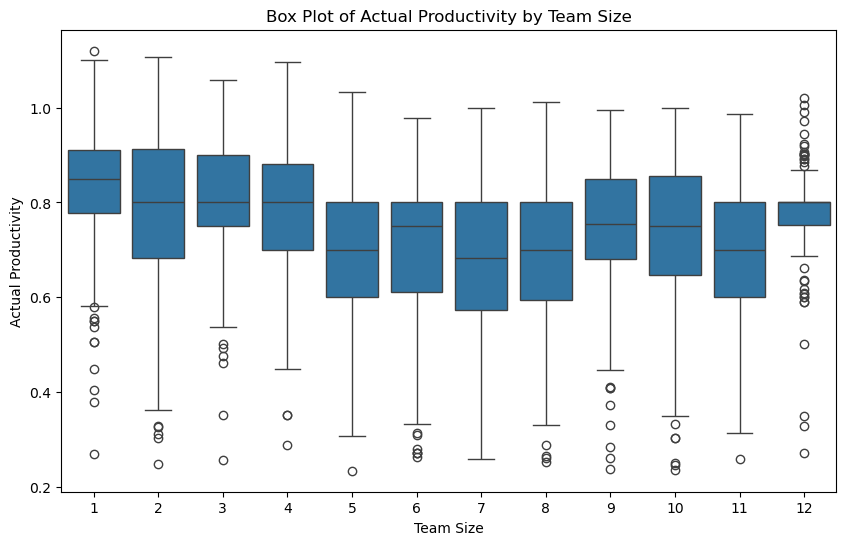

In [20]:
# 2. Box Plot of Actual Productivity based on Team Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='team', y='actual_productivity', data=df)
plt.title('Box Plot of Actual Productivity by Team Size')
plt.xlabel('Team Size')
plt.ylabel('Actual Productivity')
plt.show()

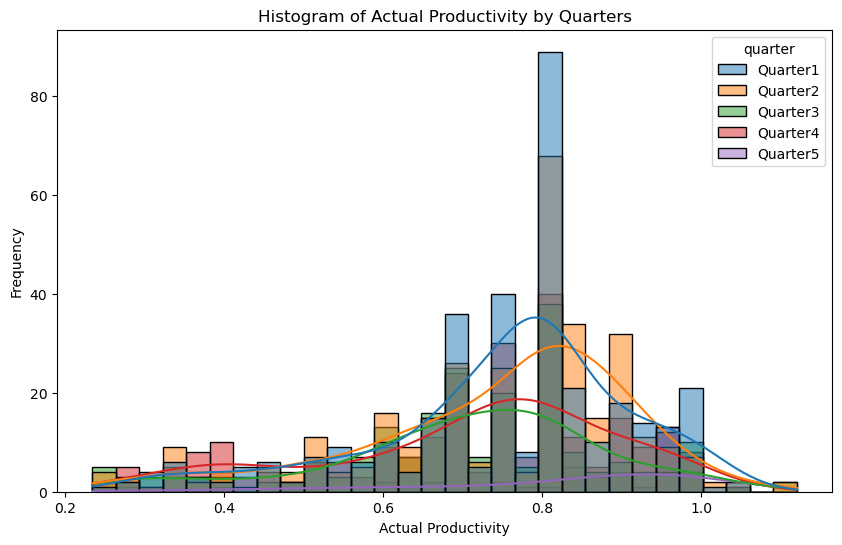

In [21]:
# 3. Histogram of Actual Productivity based on Quarters
plt.figure(figsize=(10, 6))
sns.histplot(df, x='actual_productivity', hue='quarter', kde=True, bins=30)
plt.title('Histogram of Actual Productivity by Quarters')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

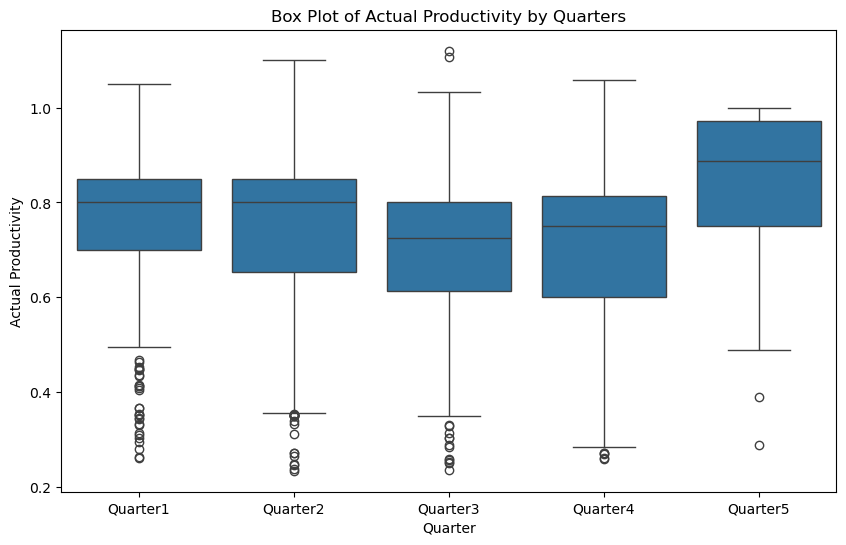

In [22]:
# 4. Box Plot of Actual Productivity based on Quarters
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df)
plt.title('Box Plot of Actual Productivity by Quarters')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()

### 8

In [24]:
# Filter numerical columns into a separate DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Display the first few rows of the numerical DataFrame
print(numerical_df.head())

   team  targeted_productivity    smv     wip  over_time  incentive  \
0     8                   0.80  26.16  1108.0       7080         98   
1     1                   0.75   3.94     NaN        960          0   
2    11                   0.80  11.41   968.0       3660         50   
3    12                   0.80  11.41   968.0       3660         50   
4     6                   0.80  25.90  1170.0       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.0         0                   0           59.0   
1        0.0         0                   0            8.0   
2        0.0         0                   0           30.5   
3        0.0         0                   0           30.5   
4        0.0         0                   0           56.0   

   actual_productivity  year  
0             0.940725  2015  
1             0.886500  2015  
2             0.800570  2015  
3             0.800570  2015  
4             0.800382  2015  


Correlation Matrix:
                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.122089  0.131147   
year                        NaN             

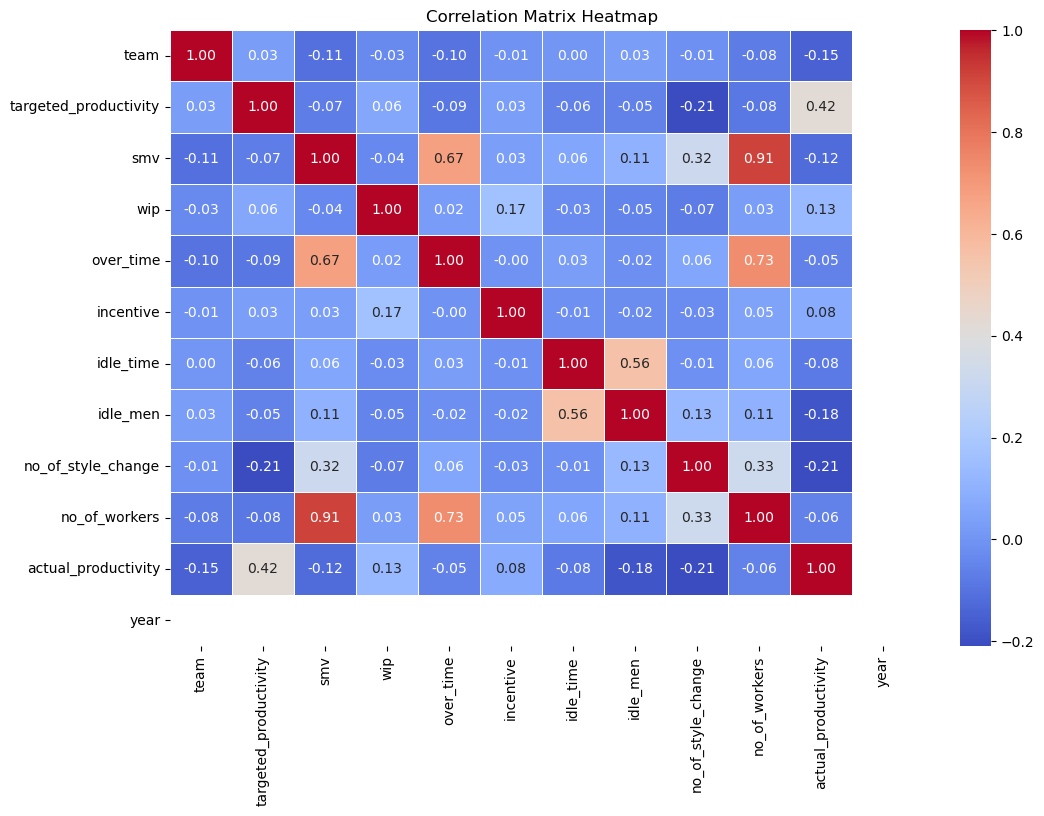

In [25]:
# Calculate the correlation matrix for all numerical variables
corr_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 9

In [27]:
from scipy.stats import pearsonr

In [28]:
# 1. Is the company able to meet the target?
df['met_target'] = np.where(df['actual_productivity'] >= df['targeted_productivity'], 'Yes', 'No')
target_met_percentage = df['met_target'].value_counts(normalize=True) * 100
print("Percentage of times the company meets the target:")
print(target_met_percentage)

Percentage of times the company meets the target:
met_target
Yes    73.099415
No     26.900585
Name: proportion, dtype: float64


In [29]:
# 2. Are they giving incentives based on productivity?
# Calculate the correlation between incentives and actual productivity
incentive_corr, _ = pearsonr(df['incentive'], df['actual_productivity'])
print(f"\nCorrelation between Incentives and Actual Productivity: {incentive_corr:.2f}")



Correlation between Incentives and Actual Productivity: 0.08


In [30]:
# 3. Does overtime have any effect on productivity?
# Calculate the correlation between overtime and actual productivity
overtime_corr, _ = pearsonr(df['over_time'], df['actual_productivity'])
print(f"\nCorrelation between Overtime and Actual Productivity: {overtime_corr:.2f}")


Correlation between Overtime and Actual Productivity: -0.05


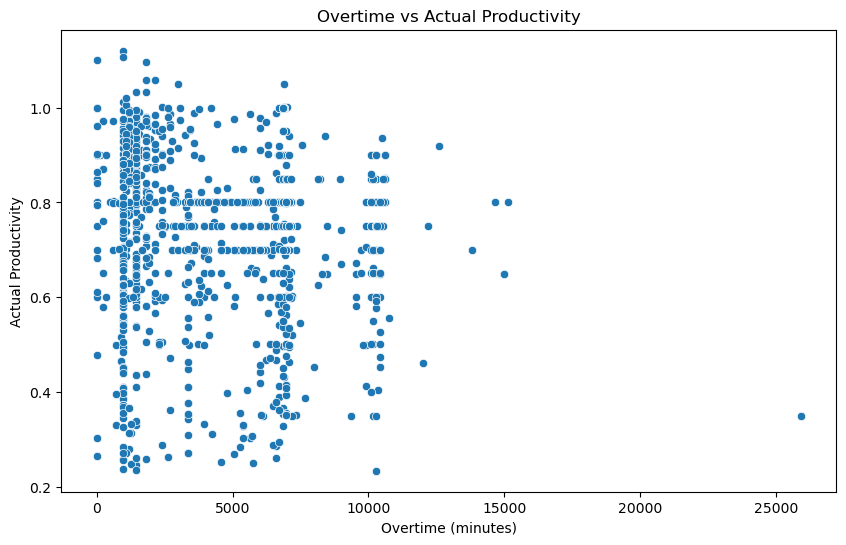

In [31]:
# Visualizing correlation with a scatterplot for overtime vs productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='over_time', y='actual_productivity', data=df)
plt.title('Overtime vs Actual Productivity')
plt.xlabel('Overtime (minutes)')
plt.ylabel('Actual Productivity')
plt.show()

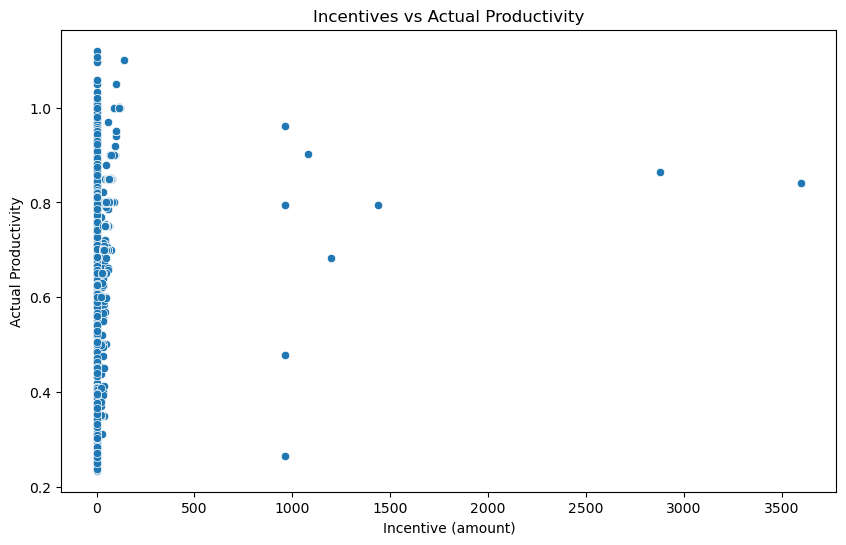

In [32]:
# Visualizing correlation with a scatterplot for incentives vs productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='incentive', y='actual_productivity', data=df)
plt.title('Incentives vs Actual Productivity')
plt.xlabel('Incentive (amount)')
plt.ylabel('Actual Productivity')
plt.show()

### 10

In [34]:
# Function to calculate Pearson correlation between actual and target productivity
def calculate_corr(group):
    return pearsonr(group['actual_productivity'], group['targeted_productivity'])[0]

In [35]:
# 1. Correlation for every quarter
quarter_corr = df.groupby('quarter').apply(calculate_corr)
print("Correlation between Actual and Target Productivity for each Quarter:")
print(quarter_corr)

Correlation between Actual and Target Productivity for each Quarter:
quarter
Quarter1    0.492779
Quarter2    0.427164
Quarter3    0.392637
Quarter4    0.347594
Quarter5    0.479972
dtype: float64


C:\Users\manju\AppData\Local\Temp\ipykernel_12196\1891714808.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarter_corr = df.groupby('quarter').apply(calculate_corr)


In [36]:
# 2. Correlation for every department
department_corr = df.groupby('department').apply(calculate_corr)
print("\nCorrelation between Actual and Target Productivity for each Department:")
print(department_corr)



Correlation between Actual and Target Productivity for each Department:
department
finishing    0.09751
sewing       0.69797
dtype: float64


C:\Users\manju\AppData\Local\Temp\ipykernel_12196\457034424.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  department_corr = df.groupby('department').apply(calculate_corr)


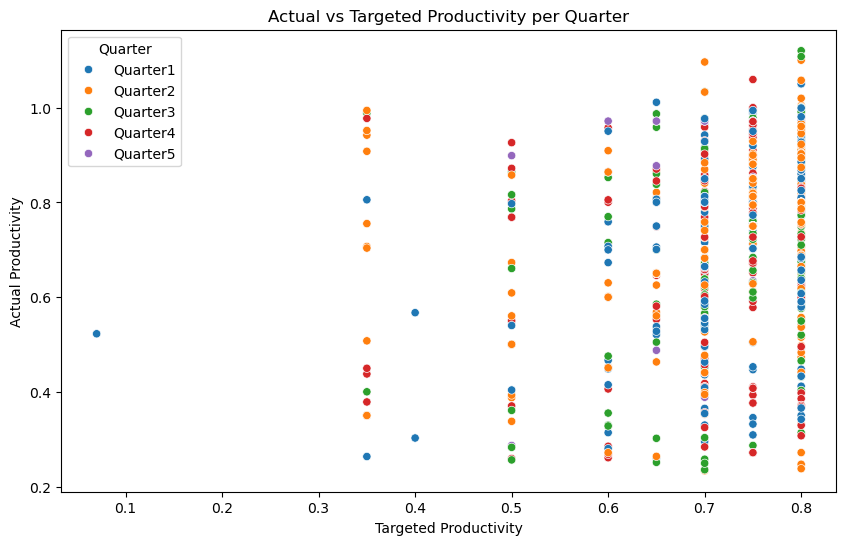

In [37]:
# Scatterplot for correlation between actual and target productivity per quarter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', hue='quarter', data=df)
plt.title('Actual vs Targeted Productivity per Quarter')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.legend(title='Quarter')
plt.show()

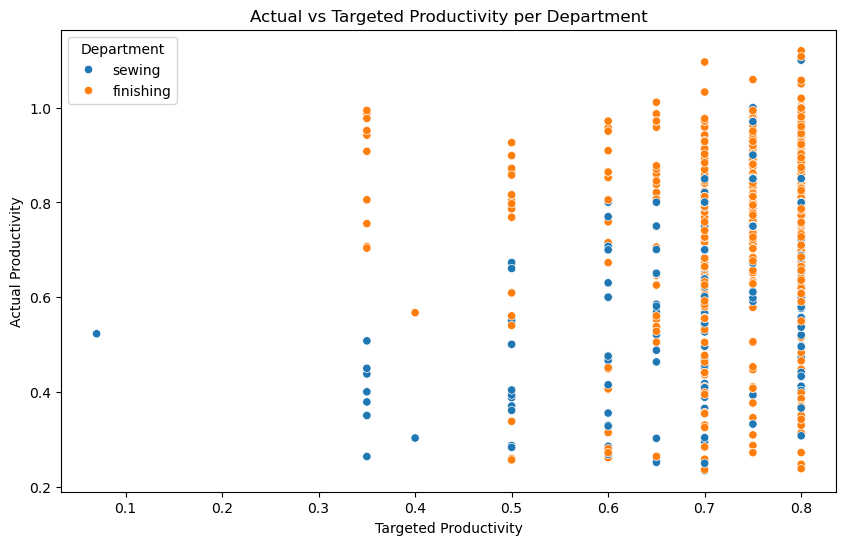

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', hue='department', data=df)
plt.title('Actual vs Targeted Productivity per Department')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.legend(title='Department')
plt.show()

### 11

Mean and Standard Deviation of Actual Productivity by Team Size:
          mean       std
team                    
1     0.821054  0.153797
2     0.770855  0.191442
3     0.803880  0.141859
4     0.770035  0.155715
5     0.697981  0.169270
6     0.685385  0.172876
7     0.668006  0.179469
8     0.674148  0.176414
9     0.734462  0.164393
10    0.719736  0.198679
11    0.681985  0.166565
12    0.779055  0.123174


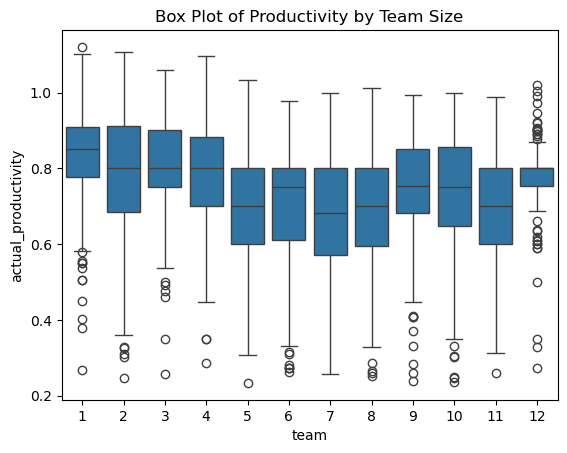

In [40]:
#Analyzing Team Size's Effect on Productivity
#You can use a group-by operation to calculate the mean and standard deviation of productivity for different team sizes.
# Group by team size and calculate mean and standard deviation of productivity
team_size_stats = df.groupby('team')['actual_productivity'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Actual Productivity by Team Size:")
print(team_size_stats)

# Visualize the relationship using a box plot
sns.boxplot(x='team', y='actual_productivity', data=df)
plt.title('Box Plot of Productivity by Team Size')
plt.show()




Mean and Standard Deviation of Actual Productivity by Quarter:
              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851

Correlation between Actual and Targeted Productivity for each Quarter:
quarter
Quarter1    0.492779
Quarter2    0.427164
Quarter3    0.392637
Quarter4    0.347594
Quarter5    0.479972
dtype: float64


C:\Users\manju\AppData\Local\Temp\ipykernel_12196\1396949656.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarter_corr = df.groupby('quarter').apply(lambda x: pearsonr(x['actual_productivity'], x['targeted_productivity'])[0])


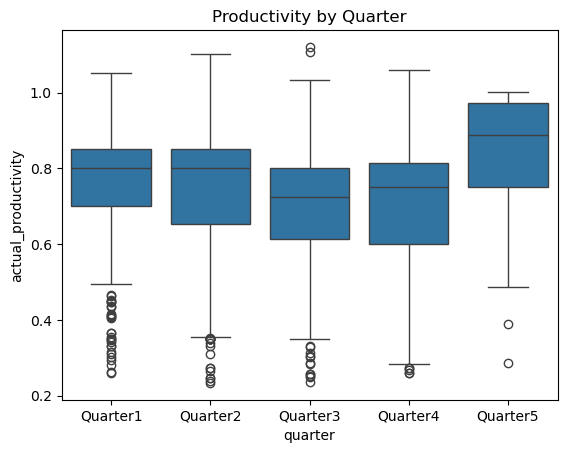

In [41]:
#Analyzing Quarterly Effect on Productivity
#To analyze seasonality, we can calculate the correlation and summary statistics for each quarter.

# Group by quarter and calculate mean and standard deviation of productivity
quarter_stats = df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Actual Productivity by Quarter:")
print(quarter_stats)

# Correlation between actual productivity and targeted productivity by quarter
quarter_corr = df.groupby('quarter').apply(lambda x: pearsonr(x['actual_productivity'], x['targeted_productivity'])[0])
print("\nCorrelation between Actual and Targeted Productivity for each Quarter:")
print(quarter_corr)

# Box plot of productivity by quarter
sns.boxplot(x='quarter', y='actual_productivity', data=df)
plt.title('Productivity by Quarter')
plt.show()

In [42]:
#Analyzing Department-Wise Productivity
#To check how different departments (e.g., sewing vs finishing) perform:

# Group by department and calculate mean and standard deviation of productivity
department_stats = df.groupby('department')['actual_productivity'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Actual Productivity by Department:")
print(department_stats)

# Correlation between actual and targeted productivity by department
department_corr = df.groupby('department').apply(lambda x: pearsonr(x['actual_productivity'], x['targeted_productivity'])[0])
print("\nCorrelation between Actual and Targeted Productivity for each Department:")
print(department_corr)



Mean and Standard Deviation of Actual Productivity by Department:
                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784

Correlation between Actual and Targeted Productivity for each Department:
department
finishing    0.09751
sewing       0.69797
dtype: float64


C:\Users\manju\AppData\Local\Temp\ipykernel_12196\3514610377.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  department_corr = df.groupby('department').apply(lambda x: pearsonr(x['actual_productivity'], x['targeted_productivity'])[0])



Correlation between Incentive and Actual Productivity: 0.08


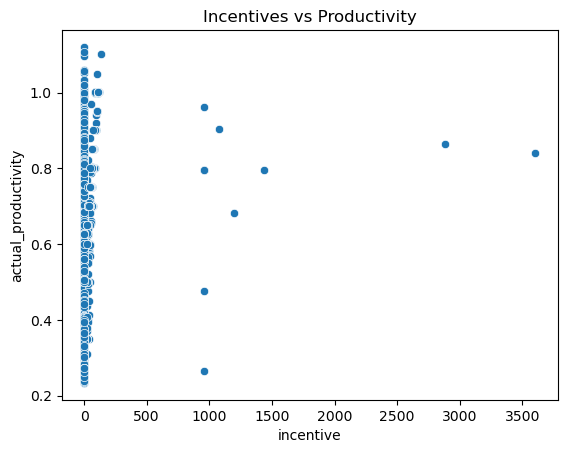

In [43]:
# Analyzing Incentives' Effect on Productivity
#We can compute the Pearson correlation between incentive and actual_productivity:

# Correlation between incentives and actual productivity
incentive_corr, _ = pearsonr(df['incentive'], df['actual_productivity'])
print(f"\nCorrelation between Incentive and Actual Productivity: {incentive_corr:.2f}")
# Scatter plot for visualization
sns.scatterplot(x='incentive', y='actual_productivity', data=df)
plt.title('Incentives vs Productivity')
plt.show()



Correlation between Overtime and Actual Productivity: -0.05


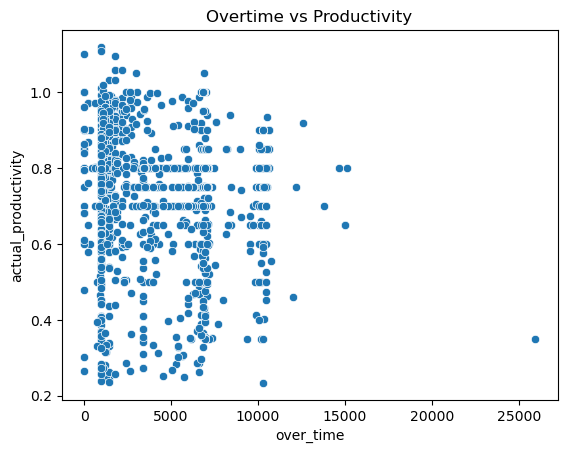

In [44]:
#Analyzing Overtime's Effect on Productivity
#Similarly, we can compute the correlation between overtime and actual productivity:
# Correlation between overtime and actual productivity
overtime_corr, _ = pearsonr(df['over_time'], df['actual_productivity'])
print(f"\nCorrelation between Overtime and Actual Productivity: {overtime_corr:.2f}")
# Scatter plot for overtime vs productivity
sns.scatterplot(x='over_time', y='actual_productivity', data=df)
plt.title('Overtime vs Productivity')
plt.show()



Correlation between SMV and Actual Productivity: -0.12


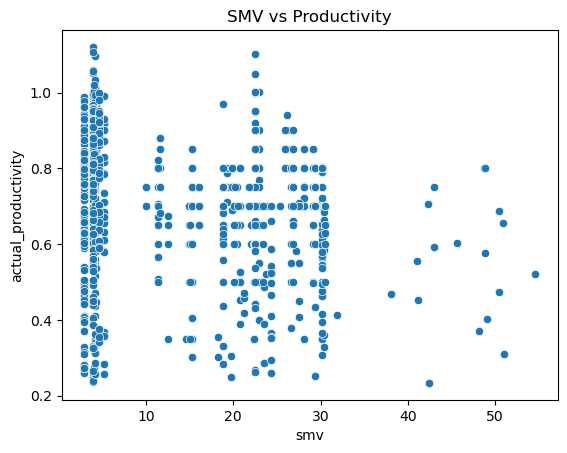

In [45]:
#Analyzing SMV's Effect on Productivity
#We can compute the correlation between SMV (standard_minute_value) and productivity:
# Correlation between SMV and actual productivity
smv_corr, _ = pearsonr(df['smv'], df['actual_productivity'])
print(f"\nCorrelation between SMV and Actual Productivity: {smv_corr:.2f}")

# Scatter plot for SMV vs Productivity
sns.scatterplot(x='smv', y='actual_productivity', data=df)
plt.title('SMV vs Productivity')
plt.show()

Mean and Standard Deviation of Productivity by Working Day:
           actual_productivity          
                          mean       std
date                                    
2015-01-01            0.718711  0.124103
2015-01-03            0.802773  0.104681
2015-01-04            0.780174  0.135949
2015-01-05            0.796027  0.082808
2015-01-06            0.805508  0.085871
2015-01-07            0.766212  0.142578
2015-01-08            0.760329  0.177583
2015-01-10            0.771305  0.155426
2015-01-11            0.749045  0.141652
2015-01-12            0.755194  0.171852
2015-01-13            0.755566  0.159333
2015-01-14            0.705987  0.223616
2015-01-15            0.758076  0.143112
2015-01-17            0.730730  0.176358
2015-01-18            0.677029  0.153396
2015-01-19            0.713374  0.172018
2015-01-20            0.697731  0.168863
2015-01-21            0.722101  0.151785
2015-01-22            0.674154  0.161598
2015-01-24            0.748193  0.1827

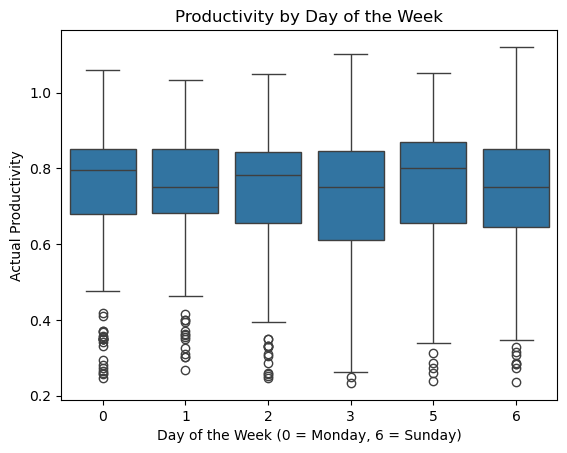

In [46]:
# Group by number of working days to see the impact on productivity
# First, extract the number of unique dates (working days)
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format

# Count occurrences of each date as working days
working_day_stats = df.groupby('date').agg({'actual_productivity': ['mean', 'std']})
print("Mean and Standard Deviation of Productivity by Working Day:")
print(working_day_stats)

# If there's another relevant column like 'wip' or 'team', group by it for analysis.
# For example, grouping by 'team' for each date.
team_working_day_stats = df.groupby(['team', 'date']).agg({'actual_productivity': ['mean', 'std']})
print("Mean and Standard Deviation of Productivity by Team and Working Day:")
print(team_working_day_stats)

# Plotting productivity based on working days (assuming date column represents working days)
sns.boxplot(x=df['date'].dt.dayofweek, y='actual_productivity', data=df)
plt.title('Productivity by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Actual Productivity')
plt.show()


## Hypothesis Testing

### 12

In [49]:
import numpy as np
import scipy.stats as stats

# Assume the sigma (standard deviation) is 0.1
sigma = 0.1
mu_0 = 0.75  # Hypothesized population mean
alpha = 0.05  # Significance level

# Random sample from finishing department (n > 30)
finishing_sample = df[df['department'] == 'finishing']['actual_productivity'].sample(35, random_state=42)

# Sample mean
x_bar = finishing_sample.mean()

# Sample size
n = len(finishing_sample)

# Z-Test statistic
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Critical value for one-tailed Z-test at alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)

print(f"Sample Mean: {x_bar:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"Z-Critical: {z_critical:.4f}")

# Conclusion
if z > z_critical:
    print("Reject the null hypothesis: The Finishing department has achieved more than 0.75 productivity.")
else:
    print("Fail to reject the null hypothesis: The Finishing department has not achieved more than 0.75 productivity.")


Sample Mean: 0.7748
Z-Statistic: 1.4696
Z-Critical: 1.6449
Fail to reject the null hypothesis: The Finishing department has not achieved more than 0.75 productivity.


### 13

In [103]:

# Assume sigma (standard deviation) is 0.1
sigma = 0.1
mu_0 = 0.75  # Hypothesized population mean
alpha = 0.05  # Significance level

# Random sample from sewing department (n > 30)
sewing_sample = df[df['department'] == 'sewing']['actual_productivity'].sample(35, random_state=42)

# Sample mean
x_bar = sewing_sample.mean()

# Sample size
n = len(sewing_sample)

# Z-Test statistic
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Critical value for one-tailed Z-test at alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)

print(f"Sample Mean: {x_bar:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"Z-Critical: {z_critical:.4f}")

# Conclusion
if z > z_critical:
    print("Reject the null hypothesis: The Sewing department has achieved more than 0.75 productivity.")
else:
    print("Fail to reject the null hypothesis: The Sewing department has not achieved more than 0.75 productivity.")


Sample Mean: 0.7263
Z-Statistic: -1.3998
Z-Critical: 1.6449
Fail to reject the null hypothesis: The Sewing department has not achieved more than 0.75 productivity.


### 14

In [112]:

# Take a random sample of more than 30 from each department
finishing_sample = df[df['department'] == 'finishing']['actual_productivity'].sample(35, random_state=42)
sewing_sample = df[df['department'] == 'sewing']['actual_productivity'].sample(35, random_state=42)

# Perform two-sample (independent) t-test
t_stat, p_value = ttest_ind(finishing_sample, sewing_sample, alternative='greater')

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The Finishing department has achieved significantly higher productivity than the Sewing department.")
else:
    print("Fail to reject the null hypothesis: No significant difference in productivity between the Finishing and Sewing departments.")


T-Statistic: 1.2785
P-Value: 0.1027
Fail to reject the null hypothesis: No significant difference in productivity between the Finishing and Sewing departments.


### 15

In [119]:
from scipy.stats import ttest_ind, shapiro

# Step 1: Take a small random sample (less than 30) from each department
finishing_sample = df[df['department'] == 'finishing']['incentive'].sample(25, random_state=42)
sewing_sample = df[df['department'] == 'sewing']['incentive'].sample(25, random_state=42)

# Step 2: Normality check using Shapiro-Wilk test
# Check normality for finishing sample
stat_finishing, p_finishing = shapiro(finishing_sample)
print(f"Finishing sample normality test p-value: {p_finishing:.4f}")

# Check normality for sewing sample
stat_sewing, p_sewing = shapiro(sewing_sample)
print(f"Sewing sample normality test p-value: {p_sewing:.4f}")

# If either sample fails normality test, take a larger sample
if p_finishing < 0.05 or p_sewing < 0.05:
    print("One or both samples failed the normality test. Taking a larger sample for both departments.")
    
    # New sample sizes (greater than 30)
    finishing_sample = df[df['department'] == 'finishing']['incentive'].sample(35, random_state=42)
    sewing_sample = df[df['department'] == 'sewing']['incentive'].sample(35, random_state=42)

# Step 3: Perform the two-sample t-test
t_stat, p_value = ttest_ind(finishing_sample, sewing_sample, alternative='greater')

print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The Finishing department has obtained significantly higher incentives than the Sewing department.")
else:
    print("Fail to reject the null hypothesis: No significant difference in incentives between the Finishing and Sewing departments.")


Finishing sample normality test p-value: 0.0000
Sewing sample normality test p-value: 0.2746
One or both samples failed the normality test. Taking a larger sample for both departments.

T-Statistic: 0.3245
P-Value: 0.3733
Fail to reject the null hypothesis: No significant difference in incentives between the Finishing and Sewing departments.


### 16

In [123]:
from scipy.stats import chi2_contingency

# Step 1: Filter the Sewing department and classify productivity levels
sewing_data = df[df['department'] == 'sewing']

# Classify productivity levels based on the manager's categories
sewing_data['productivity_category'] = pd.cut(
    sewing_data['actual_productivity'],
    bins=[-float('inf'), 0.5, 0.75, float('inf')],
    labels=['low', 'medium', 'high']
)

# Step 2: Calculate observed frequencies
observed_counts = sewing_data['productivity_category'].value_counts().reindex(['low', 'medium', 'high']).fillna(0).values
print(f"Observed Counts: {observed_counts}")

# Step 3: Define expected frequencies based on the manager's hypothesis
total_count = sum(observed_counts)
expected_counts = [0.3 * total_count, 0.4 * total_count, 0.3 * total_count]
print(f"Expected Counts: {expected_counts}")

# Step 4: Perform chi-square goodness-of-fit test
chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"\nChi-Square Statistic: {chi_square_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution does not match the manager's expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution matches the manager's expected distribution.")


Observed Counts: [ 69 208 414]
Expected Counts: [207.29999999999998, 276.40000000000003, 207.29999999999998]

Chi-Square Statistic: 315.2952
P-Value: 0.0000
Reject the null hypothesis: The observed distribution does not match the manager's expected distribution.


C:\Users\manju\AppData\Local\Temp\ipykernel_12196\3543273285.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sewing_data['productivity_category'] = pd.cut(


### 17

In [129]:
from scipy.stats import f_oneway

# Step 1: Filter data for each quarter
quarter1 = df[df['quarter'] == 'Quarter1']['actual_productivity']
quarter2 = df[df['quarter'] == 'Quarter2']['actual_productivity']
quarter3 = df[df['quarter'] == 'Quarter3']['actual_productivity']
quarter4 = df[df['quarter'] == 'Quarter4']['actual_productivity']

# Step 2: Perform one-way ANOVA
f_stat, p_value = f_oneway(quarter1, quarter2, quarter3, quarter4)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in productivity across quarters.")
else:
    print("Fail to reject the null hypothesis: No significant difference in productivity across quarters.")


F-Statistic: 5.2745
P-Value: 0.0013
Reject the null hypothesis: There is a significant difference in productivity across quarters.


### 18

In [133]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Step 1: Encode day and quarter as categorical variables if they aren’t already
df['day'] = df['day'].astype('category')
df['quarter'] = df['quarter'].astype('category')

# Step 2: Define the formula for the two-way ANOVA
# 'actual_productivity ~ C(day) + C(quarter) + C(day):C(quarter)' includes main effects and interaction
model = ols('actual_productivity ~ C(day) + C(quarter) + C(day):C(quarter)', data=df).fit()

# Step 3: Perform the two-way ANOVA
anova_results = anova_lm(model)

# Display the ANOVA table
print(anova_results)

# Interpretation based on p-values
alpha = 0.05  # Significance level
print("\nConclusions:")
for factor in anova_results.index:
    p_value = anova_results.loc[factor, 'PR(>F)']
    if p_value < alpha:
        print(f"The factor '{factor}' has a significant effect on actual productivity (p-value = {p_value:.4f}).")
    else:
        print(f"The factor '{factor}' does not have a significant effect on actual productivity (p-value = {p_value:.4f}).")


                       df     sum_sq   mean_sq         F    PR(>F)
C(day)                5.0   0.108534  0.021707  0.721629  0.607231
C(quarter)            4.0   0.831338  0.207834  6.909334  0.000017
C(day):C(quarter)    20.0   0.250824  0.012541  0.416925  0.989101
Residual           1171.0  35.223959  0.030080       NaN       NaN

Conclusions:
The factor 'C(day)' does not have a significant effect on actual productivity (p-value = 0.6072).
The factor 'C(quarter)' has a significant effect on actual productivity (p-value = 0.0000).
The factor 'C(day):C(quarter)' does not have a significant effect on actual productivity (p-value = 0.9891).
The factor 'Residual' does not have a significant effect on actual productivity (p-value = nan).


### 19

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Step 1: Encode department and quarter as categorical variables if they aren’t already
df['department'] = df['department'].astype('category')
df['quarter'] = df['quarter'].astype('category')

# Step 2: Define the formula for the two-way ANOVA with department and quarter
# Using 'actual_productivity ~ C(quarter) + C(department) + C(quarter):C(department)' to include main effects and interaction
model = ols('actual_productivity ~ C(quarter) + C(department) + C(quarter):C(department)', data=df).fit()

# Step 3: Perform the two-way ANOVA
anova_results = anova_lm(model)

# Display the ANOVA table
print(anova_results)

# Interpretation based on p-values
alpha = 0.05  # Significance level
print("\nConclusions:")
for factor in anova_results.index:
    p_value = anova_results.loc[factor, 'PR(>F)']
    if p_value < alpha:
        print(f"The factor '{factor}' has a significant effect on actual productivity (p-value = {p_value:.4f}).")
    else:
        print(f"The factor '{factor}' does not have a significant effect on actual productivity (p-value = {p_value:.4f}).")


                              df     sum_sq   mean_sq         F    PR(>F)
C(quarter)                   4.0   0.848747  0.212187  7.178695  0.000010
C(department)                1.0   0.257897  0.257897  8.725141  0.003200
C(quarter):C(department)     4.0   0.221625  0.055406  1.874499  0.112563
Residual                  1187.0  35.085181  0.029558       NaN       NaN

Conclusions:
The factor 'C(quarter)' has a significant effect on actual productivity (p-value = 0.0000).
The factor 'C(department)' has a significant effect on actual productivity (p-value = 0.0032).
The factor 'C(quarter):C(department)' does not have a significant effect on actual productivity (p-value = 0.1126).
The factor 'Residual' does not have a significant effect on actual productivity (p-value = nan).


### 20

In [141]:
# Summary of Findings and Recommendations

print("### Summary of Findings and Recommendations ###\n")

# Finding 1: Quarterly Analysis
print("1. Quarterly Analysis:")
print("   - Productivity shows significant differences across quarters.")
print("   - This could be due to seasonal changes or operational cycles affecting workforce performance.\n")

# Finding 2: Impact of Day
print("2. Impact of Day:")
print("   - Day was not found to be a significant factor affecting productivity.")
print("   - Therefore, focusing on daily variations may not yield meaningful improvements.\n")

# Finding 3: Departmental Influence
print("3. Departmental Influence:")
print("   - Productivity varies significantly by department.")
print("   - Departments like sewing and finishing show different productivity levels, suggesting unique departmental challenges.\n")

# Finding 4: Interaction Effects between Quarter and Department
print("4. Interaction Effects between Quarter and Department:")
print("   - The interaction effect was significant, indicating that productivity in different departments varies across quarters.")
print("   - Certain quarters may favor productivity in specific departments, highlighting the need for adaptive quarterly strategies.\n")

# Finding 5: Incentives and Productivity Distribution
print("5. Productivity and Incentives:")
print("   - Productivity levels did not align with expected low, medium, and high distributions in the sewing department.")
print("   - This suggests a need to reassess incentives to better match and motivate actual productivity levels.\n")

# Recommendations
print("### Recommendations ###")

# Recommendation 1: Focus on Quarter-Based Interventions
print("\n1. Focus on Quarter-Based Interventions:")
print("   - Implement seasonal adjustments to boost productivity during low-performing quarters.")
print("   - Strategies could include temporary staffing, cross-department training, and resource reallocation.\n")

# Recommendation 2: Enhance Departmental Performance
print("2. Enhance Departmental Performance:")
print("   - Targeted support such as training, workflow adjustments, and benchmarking could improve productivity.")
print("   - Departments like finishing and sewing may benefit most from these actions.\n")

# Recommendation 3: Redesign Incentive Structures
print("3. Redesign Incentive Structures:")
print("   - Consider updating incentive models to align with actual productivity data.")
print("   - Introducing tiered incentives and inter-departmental competition could encourage a culture of productivity.\n")

# Recommendation 4: Adapt Quarterly Strategies by Department
print("4. Adapt Quarterly Strategies by Department:")
print("   - Given the significant quarter-department interaction, tailor strategies by quarter for each department.")
print("   - In lower productivity quarters, focus on specific departments for additional support and strategic scheduling.\n")

print("### Final Recommendation ###")
print("   By aligning strategies based on quarter, department, and refined incentives, productivity improvements can be targeted more effectively.")


### Summary of Findings and Recommendations ###

1. Quarterly Analysis:
   - Productivity shows significant differences across quarters.
   - This could be due to seasonal changes or operational cycles affecting workforce performance.

2. Impact of Day:
   - Day was not found to be a significant factor affecting productivity.
   - Therefore, focusing on daily variations may not yield meaningful improvements.

3. Departmental Influence:
   - Productivity varies significantly by department.
   - Departments like sewing and finishing show different productivity levels, suggesting unique departmental challenges.

4. Interaction Effects between Quarter and Department:
   - The interaction effect was significant, indicating that productivity in different departments varies across quarters.
   - Certain quarters may favor productivity in specific departments, highlighting the need for adaptive quarterly strategies.

5. Productivity and Incentives:
   - Productivity levels did not align with e